## 1. Importing Basic Libraries and Datasets

In [85]:
df = pd.read_csv("data/train.csv") #with all this not all the columns are not visible. so we use:
pd.set_option("display.max_columns",100)
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings # it ignores warning messages 
warnings.filterwarnings("ignore")

In [87]:
df.dtypes

Unnamed: 0                             int64
id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure 

## 2. Data Exploration, Cleaning and Handling

In [88]:
df.shape # rows: 103904, columns: 25

(103904, 25)

In [89]:
#identify unnecessary columns

#1. unnamed:0
#2. id

## Remove unnecessary features

df = df.drop(["Unnamed: 0", "id"],axis=1)

In [90]:
len(df.columns)

23

In [91]:
df.isnull().sum() # checking null values (Arrival Delay in Minutes  : 310)

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [92]:
df.duplicated().sum() # no duplicate values in dataset

0

In [93]:
# MAKING CORRELATION MATRICS
numeric_df = df.select_dtypes(include = "number")

corr = numeric_df.corr()
corr

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
Age,1.000000,0.099461,0.017859,0.038125,0.024842,-0.001330,0.023000,0.208939,0.160277,0.076444,0.057594,0.040583,-0.047529,0.035482,-0.049427,0.053611,-0.010152,-0.012147
Flight Distance,0.099461,1.000000,0.007131,-0.020043,0.065717,0.004793,0.056994,0.214869,0.157333,0.128740,0.109526,0.133916,0.063184,0.073072,0.057540,0.093149,0.002158,-0.002426
Inflight wifi service,0.017859,0.007131,1.000000,0.343845,0.715856,0.336248,0.134718,0.456970,0.122658,0.209321,0.121500,0.160473,0.120923,0.043193,0.110441,0.132698,-0.017402,-0.019095
Departure/Arrival time convenient,0.038125,-0.020043,0.343845,1.000000,0.436961,0.444757,0.004906,0.070119,0.011344,-0.004861,0.068882,0.012441,0.072126,0.093333,0.073318,0.014292,0.001005,-0.000864
Ease of Online booking,0.024842,0.065717,0.715856,0.436961,1.000000,0.458655,0.031873,0.404074,0.030014,0.047032,0.038833,0.107601,0.038762,0.011081,0.035272,0.016179,-0.006371,-0.007984
Gate location,-0.001330,0.004793,0.336248,0.444757,0.458655,1.000000,-0.001159,0.001688,0.003669,0.003517,-0.028373,-0.005873,0.002313,-0.035427,0.001681,-0.003830,0.005467,0.005143
Food and drink,0.023000,0.056994,0.134718,0.004906,0.031873,-0.001159,1.000000,0.234468,0.574556,0.622512,0.059073,0.032498,0.034746,0.087299,0.033993,0.657760,-0.029926,-0.032524
Online boarding,0.208939,0.214869,0.456970,0.070119,0.404074,0.001688,0.234468,1.000000,0.420211,0.285066,0.155443,0.123950,0.083280,0.204462,0.074573,0.331517,-0.018982,-0.021949
Seat comfort,0.160277,0.157333,0.122658,0.011344,0.030014,0.003669,0.574556,0.420211,1.000000,0.610590,0.131971,0.105559,0.074542,0.191854,0.069218,0.678534,-0.027898,-0.029900
Inflight entertainment,0.076444,0.128740,0.209321,-0.004861,0.047032,0.003517,0.622512,0.285066,0.610590,1.000000,0.420153,0.299692,0.378210,0.120867,0.404855,0.691815,-0.027489,-0.030703


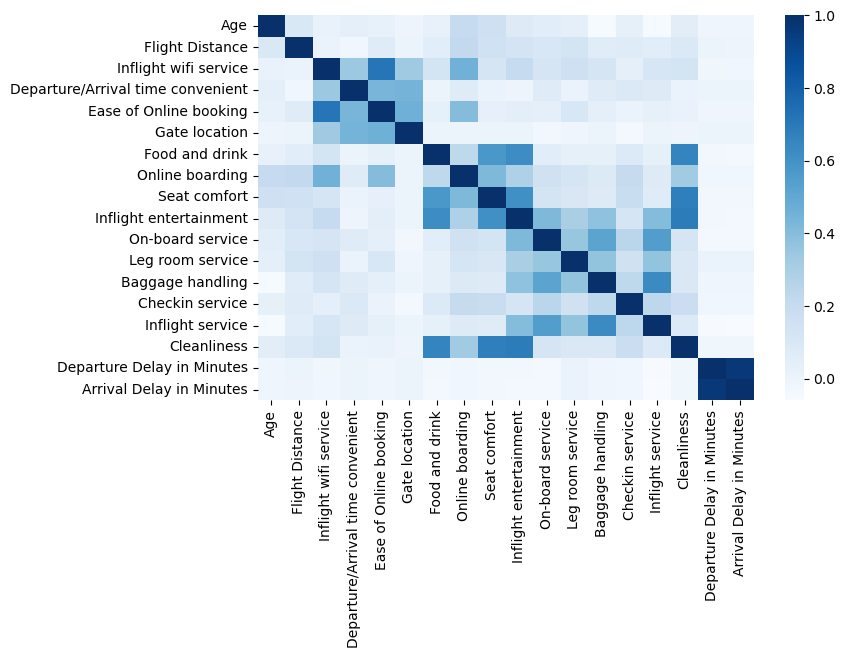

In [94]:
# heat map for correlation matrics
plt.figure(figsize=(8,5))
sns.heatmap(corr, cmap = "Blues")
plt.show()

###### Departure delay and arrival delay : highly +vely correlated --- if a flight departs late, it is likely to arrive late as well

In [95]:
df.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


#### Insights
- Arrival Delay Column:
    - minimum arrival delay is 0 (indicating no delay)
    - maximun arrival delay is 1584
    
- Flight Distance Columns:
    - shortest flight distance in dataset is 31(suspicious)
    - longest flight distance in the dataset is 4983
    
- Departure Delay Column:
    - minimun departure delay is 0
    - maximum departure delay is 1592
    
- note: 
     - there appears to be outliear in the data as there is significant difference between 3rd quartile (Q3) and the maximum value

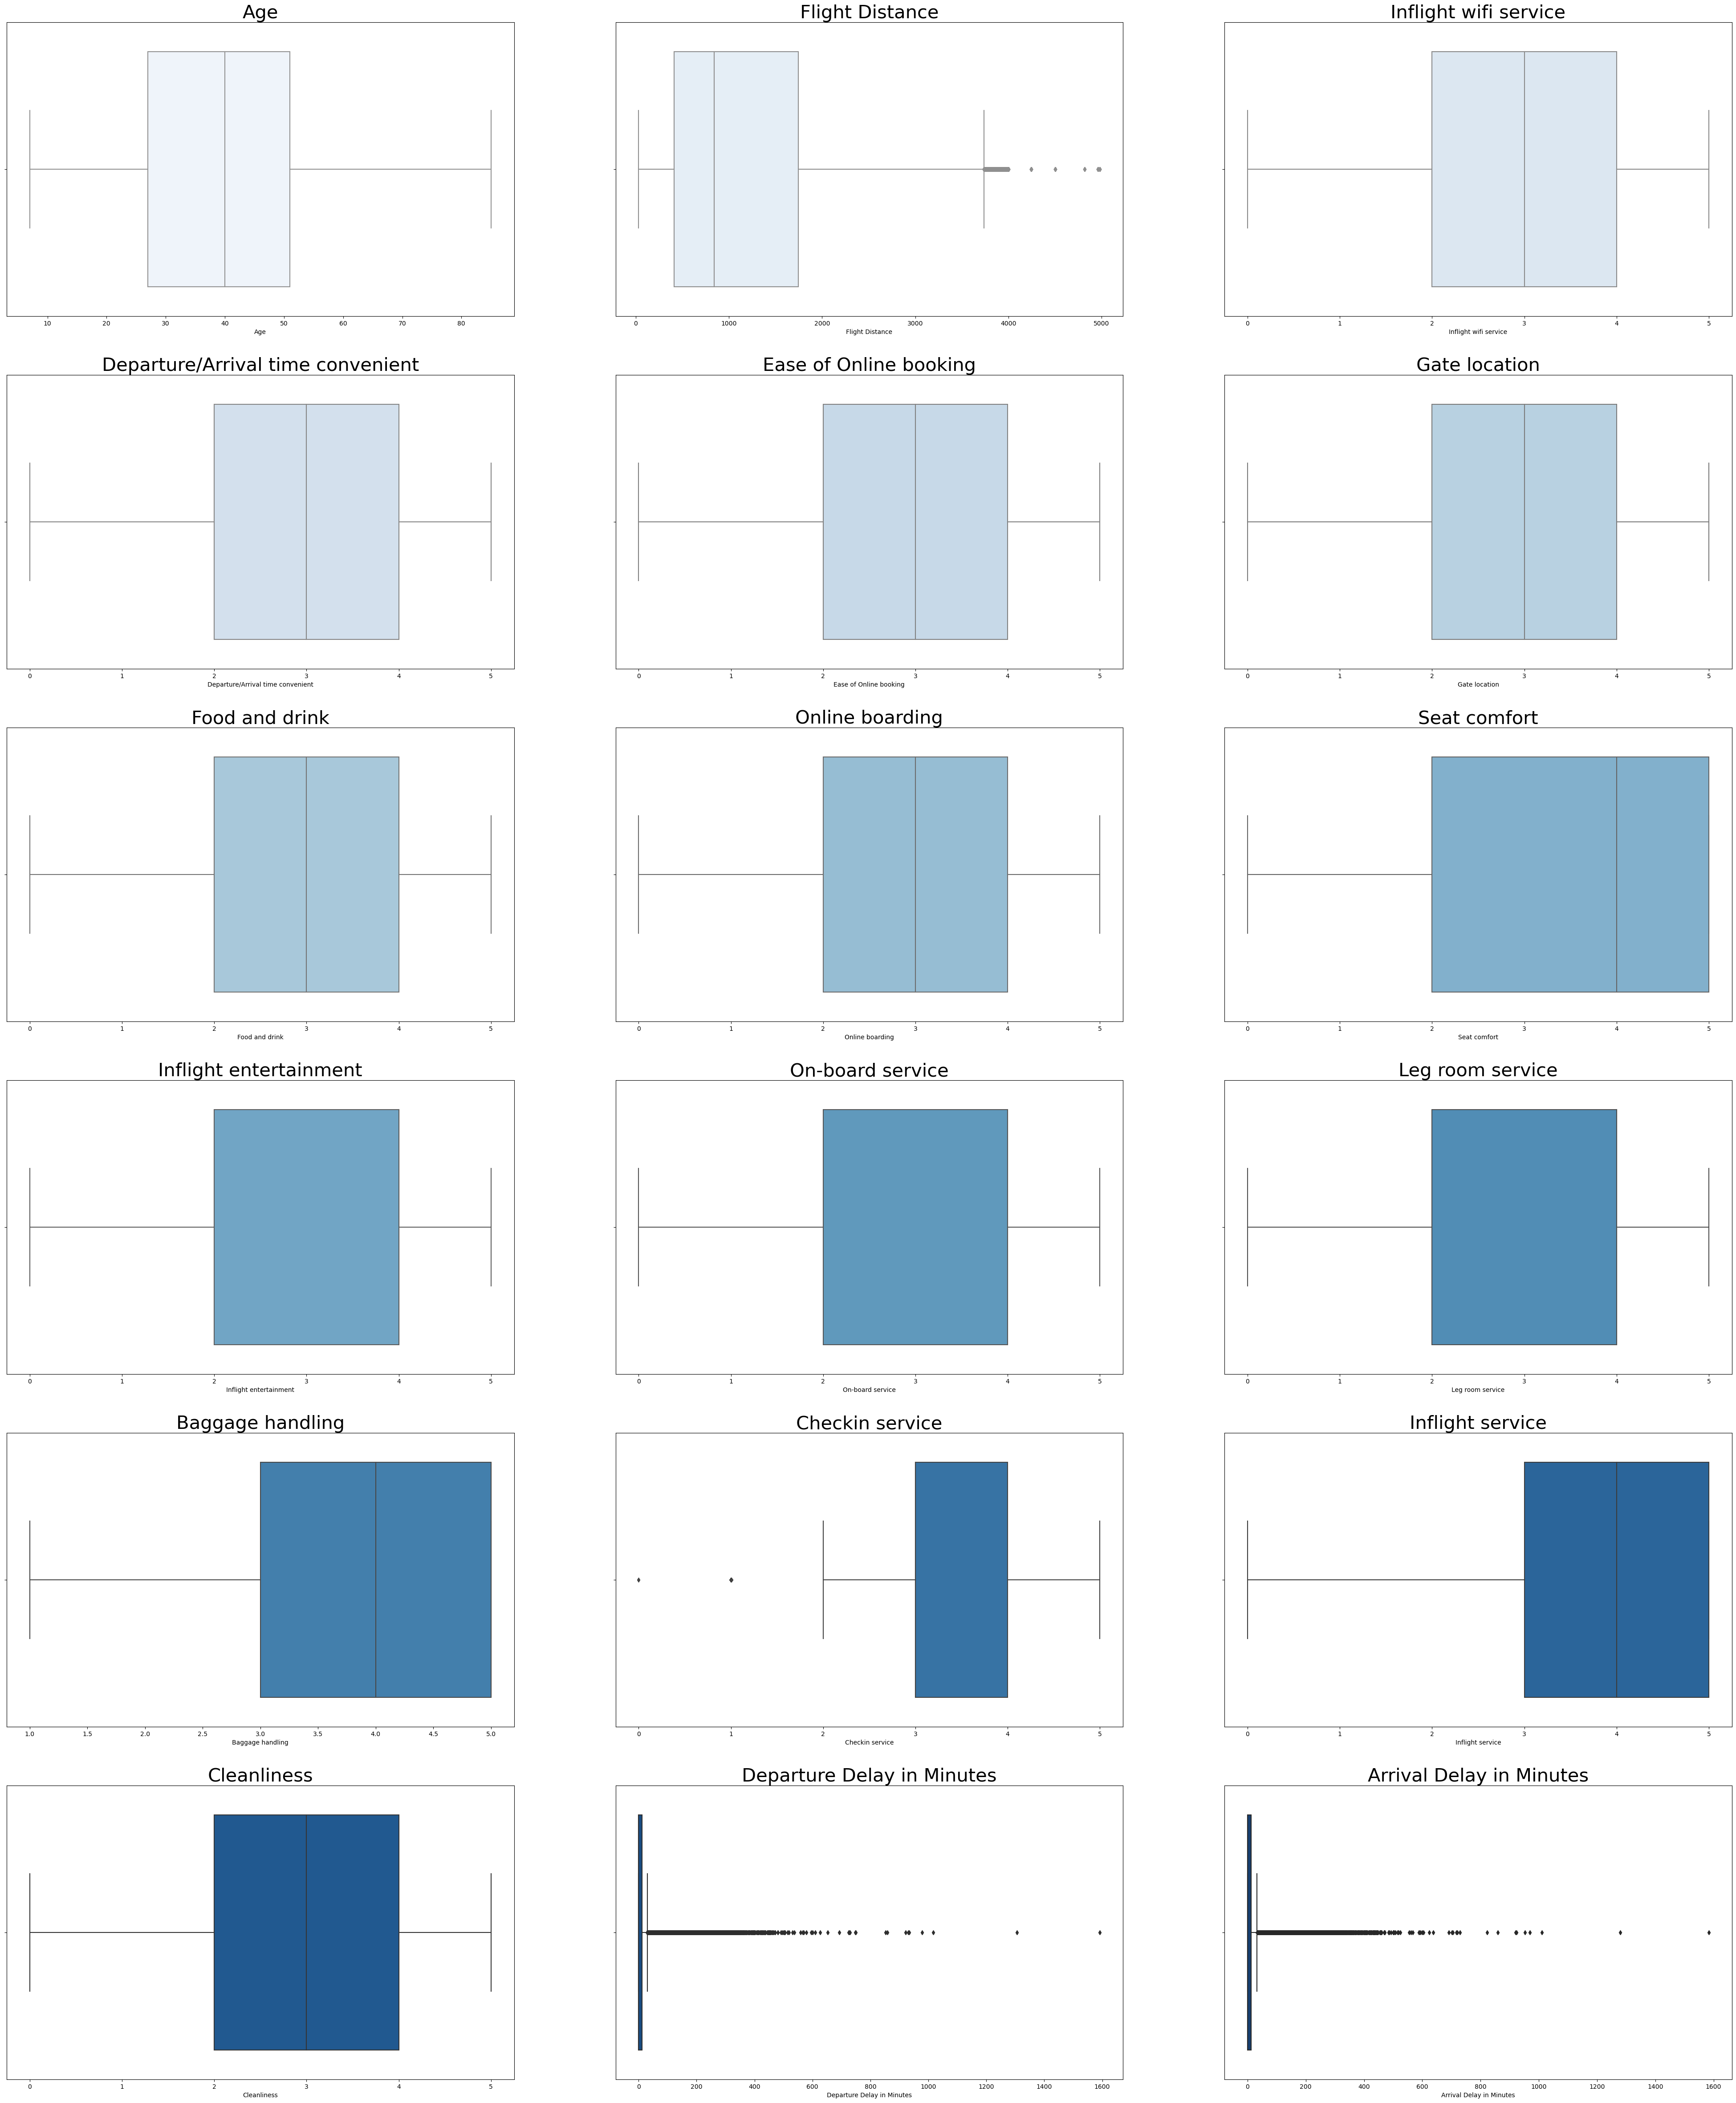

In [96]:
## Check for Outliears

numericals = df.select_dtypes(include = ["int", "float"])

blue_palette = sns.color_palette("Blues", n_colors = len(numericals.columns)) # create x length colours to make interactive

fig,axes = plt.subplots(6,3, figsize=(50,60)) # 6 rows and 3 columns 
axes = axes.flatten() # to view in 2d

for i,col in enumerate(numericals.columns):  #
    sns.boxplot(x=df[col], ax = axes[i], color=blue_palette[i])
    axes[i].set_title(col, fontsize = 30)
    
plt.show()

###### we know there columns have outliears :
- 1. departure delay (too much)
- 2. arrival delay (too much)
- 3. check-in service (very less)
- 4. flight distance (moderate)

In [97]:
# HANDLE OUTLIEARS

def handel_outliears(df,columns):
    for column in columns:
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)   
        iqr = q3-q1
        
        lower_bound = q1 - 0.5*iqr
        upper_bound = q3 + 0.5*iqr   
        df[column] = df[column].clip(lower = lower_bound, upper = upper_bound)
        
    return df

columns_to_handel = ["Flight Distance","Departure Delay in Minutes", "Arrival Delay in Minutes", "Checkin service"]
df = handel_outliears(df,columns_to_handel)

#it does not remove the outliears but assigns lower_bound value to much lower values and upper_bound values to much higher values

In [98]:
df.shape

(103904, 23)

In [99]:
## HANDLE NULL VALUES OF ARRIVAL DELAY IN MINUTES

df["Arrival Delay in Minutes"] = df["Arrival Delay in Minutes"].fillna(df["Arrival Delay in Minutes"].median())

In [100]:
df.isnull().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

## 3. EDA

In [101]:
new_df = df.copy() #new_df for visualization and df for model

In [102]:
new_df.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [103]:
columns_with_six_categories = new_df.columns[new_df.nunique()==6] # some of the rating categories ranges from [0,5] total-6 and some[1-5] categories ranges form total-5
columns_with_six_categories

Index(['Inflight wifi service', 'Departure/Arrival time convenient',
       'Ease of Online booking', 'Gate location', 'Food and drink',
       'Online boarding', 'Seat comfort', 'Inflight entertainment',
       'On-board service', 'Leg room service', 'Inflight service',
       'Cleanliness'],
      dtype='object')

In [104]:
# example of column with 6 categories
new_df["Cleanliness"].value_counts()

4    27179
3    24574
5    22689
2    16132
1    13318
0       12
Name: Cleanliness, dtype: int64

In [105]:
# now we will do mapping for all the ratings so, 1: very poor
ordinal_mapping = {
    0:"very poor",
    1:"poor",
    2:"average",
    3:"good",
    4:"excellent",
    5:"outstanding"
}

In [106]:
new_df[columns_with_six_categories] = new_df[columns_with_six_categories].applymap( lambda x: ordinal_mapping.get(x,x))
new_df.head(5)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460.0,good,excellent,good,poor,outstanding,good,outstanding,outstanding,excellent,good,4,4.0,outstanding,outstanding,18,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235.0,good,average,good,good,poor,good,poor,poor,poor,outstanding,3,2.5,excellent,poor,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142.0,average,average,average,average,outstanding,outstanding,outstanding,outstanding,excellent,good,4,4.0,excellent,outstanding,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562.0,average,outstanding,outstanding,outstanding,average,average,average,average,average,outstanding,3,2.5,excellent,average,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214.0,good,good,good,good,excellent,outstanding,outstanding,good,good,excellent,4,3.0,good,good,0,0.0,satisfied


In [107]:
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460.0,3,4,3,1,5,3,5,5,4,3,4,4.0,5,5,18,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235.0,3,2,3,3,1,3,1,1,1,5,3,2.5,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142.0,2,2,2,2,5,5,5,5,4,3,4,4.0,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562.0,2,5,5,5,2,2,2,2,2,5,3,2.5,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214.0,3,3,3,3,4,5,5,3,3,4,4,3.0,3,3,0,0.0,satisfied


In [108]:
df["Baggage handling"].value_counts() # it has only 5 categories so,
# it does not have any 0 values in it so we need another mapping for it

4    37383
5    27131
3    20632
2    11521
1     7237
Name: Baggage handling, dtype: int64

In [109]:
mapping = {
    1:"very poor",
    2:"poor",
    3:"average",
    4:"good",
    5:"excellent",
}
new_df["Baggage handling"] = new_df["Baggage handling"].apply(lambda x: mapping.get(x,x))

In [110]:
new_df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460.0,good,excellent,good,poor,outstanding,good,outstanding,outstanding,excellent,good,good,4.0,outstanding,outstanding,18,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235.0,good,average,good,good,poor,good,poor,poor,poor,outstanding,average,2.5,excellent,poor,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142.0,average,average,average,average,outstanding,outstanding,outstanding,outstanding,excellent,good,good,4.0,excellent,outstanding,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562.0,average,outstanding,outstanding,outstanding,average,average,average,average,average,outstanding,average,2.5,excellent,average,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214.0,good,good,good,good,excellent,outstanding,outstanding,good,good,excellent,good,3.0,good,good,0,0.0,satisfied


In [111]:
df["Checkin service"].value_counts() #it also has other type of mapping

4.0    29055
3.0    28446
2.5    25784
4.5    20619
Name: Checkin service, dtype: int64

In [112]:
mapping = {
    1.5: "very poor",
    2.5:"poor",     
    3.0: "average",
    4.0: "good",
    4.5:"excellent",
    
    }
 

new_df["Checkin service"] = new_df["Checkin service"].apply(lambda x: mapping.get(x,x))

In [113]:
new_df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460.0,good,excellent,good,poor,outstanding,good,outstanding,outstanding,excellent,good,good,good,outstanding,outstanding,18,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235.0,good,average,good,good,poor,good,poor,poor,poor,outstanding,average,poor,excellent,poor,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142.0,average,average,average,average,outstanding,outstanding,outstanding,outstanding,excellent,good,good,good,excellent,outstanding,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562.0,average,outstanding,outstanding,outstanding,average,average,average,average,average,outstanding,average,poor,excellent,average,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214.0,good,good,good,good,excellent,outstanding,outstanding,good,good,excellent,good,average,good,good,0,0.0,satisfied


## Now all set for EDA

In [114]:
df.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

### UNIVARIATE EDA

In [115]:
numerical_columns = ['Age','Flight Distance','Departure Delay in Minutes', 'Arrival Delay in Minutes']
categorical_columns = ['Gender', 'Customer Type', 'Type of Travel', 'Class','Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness']

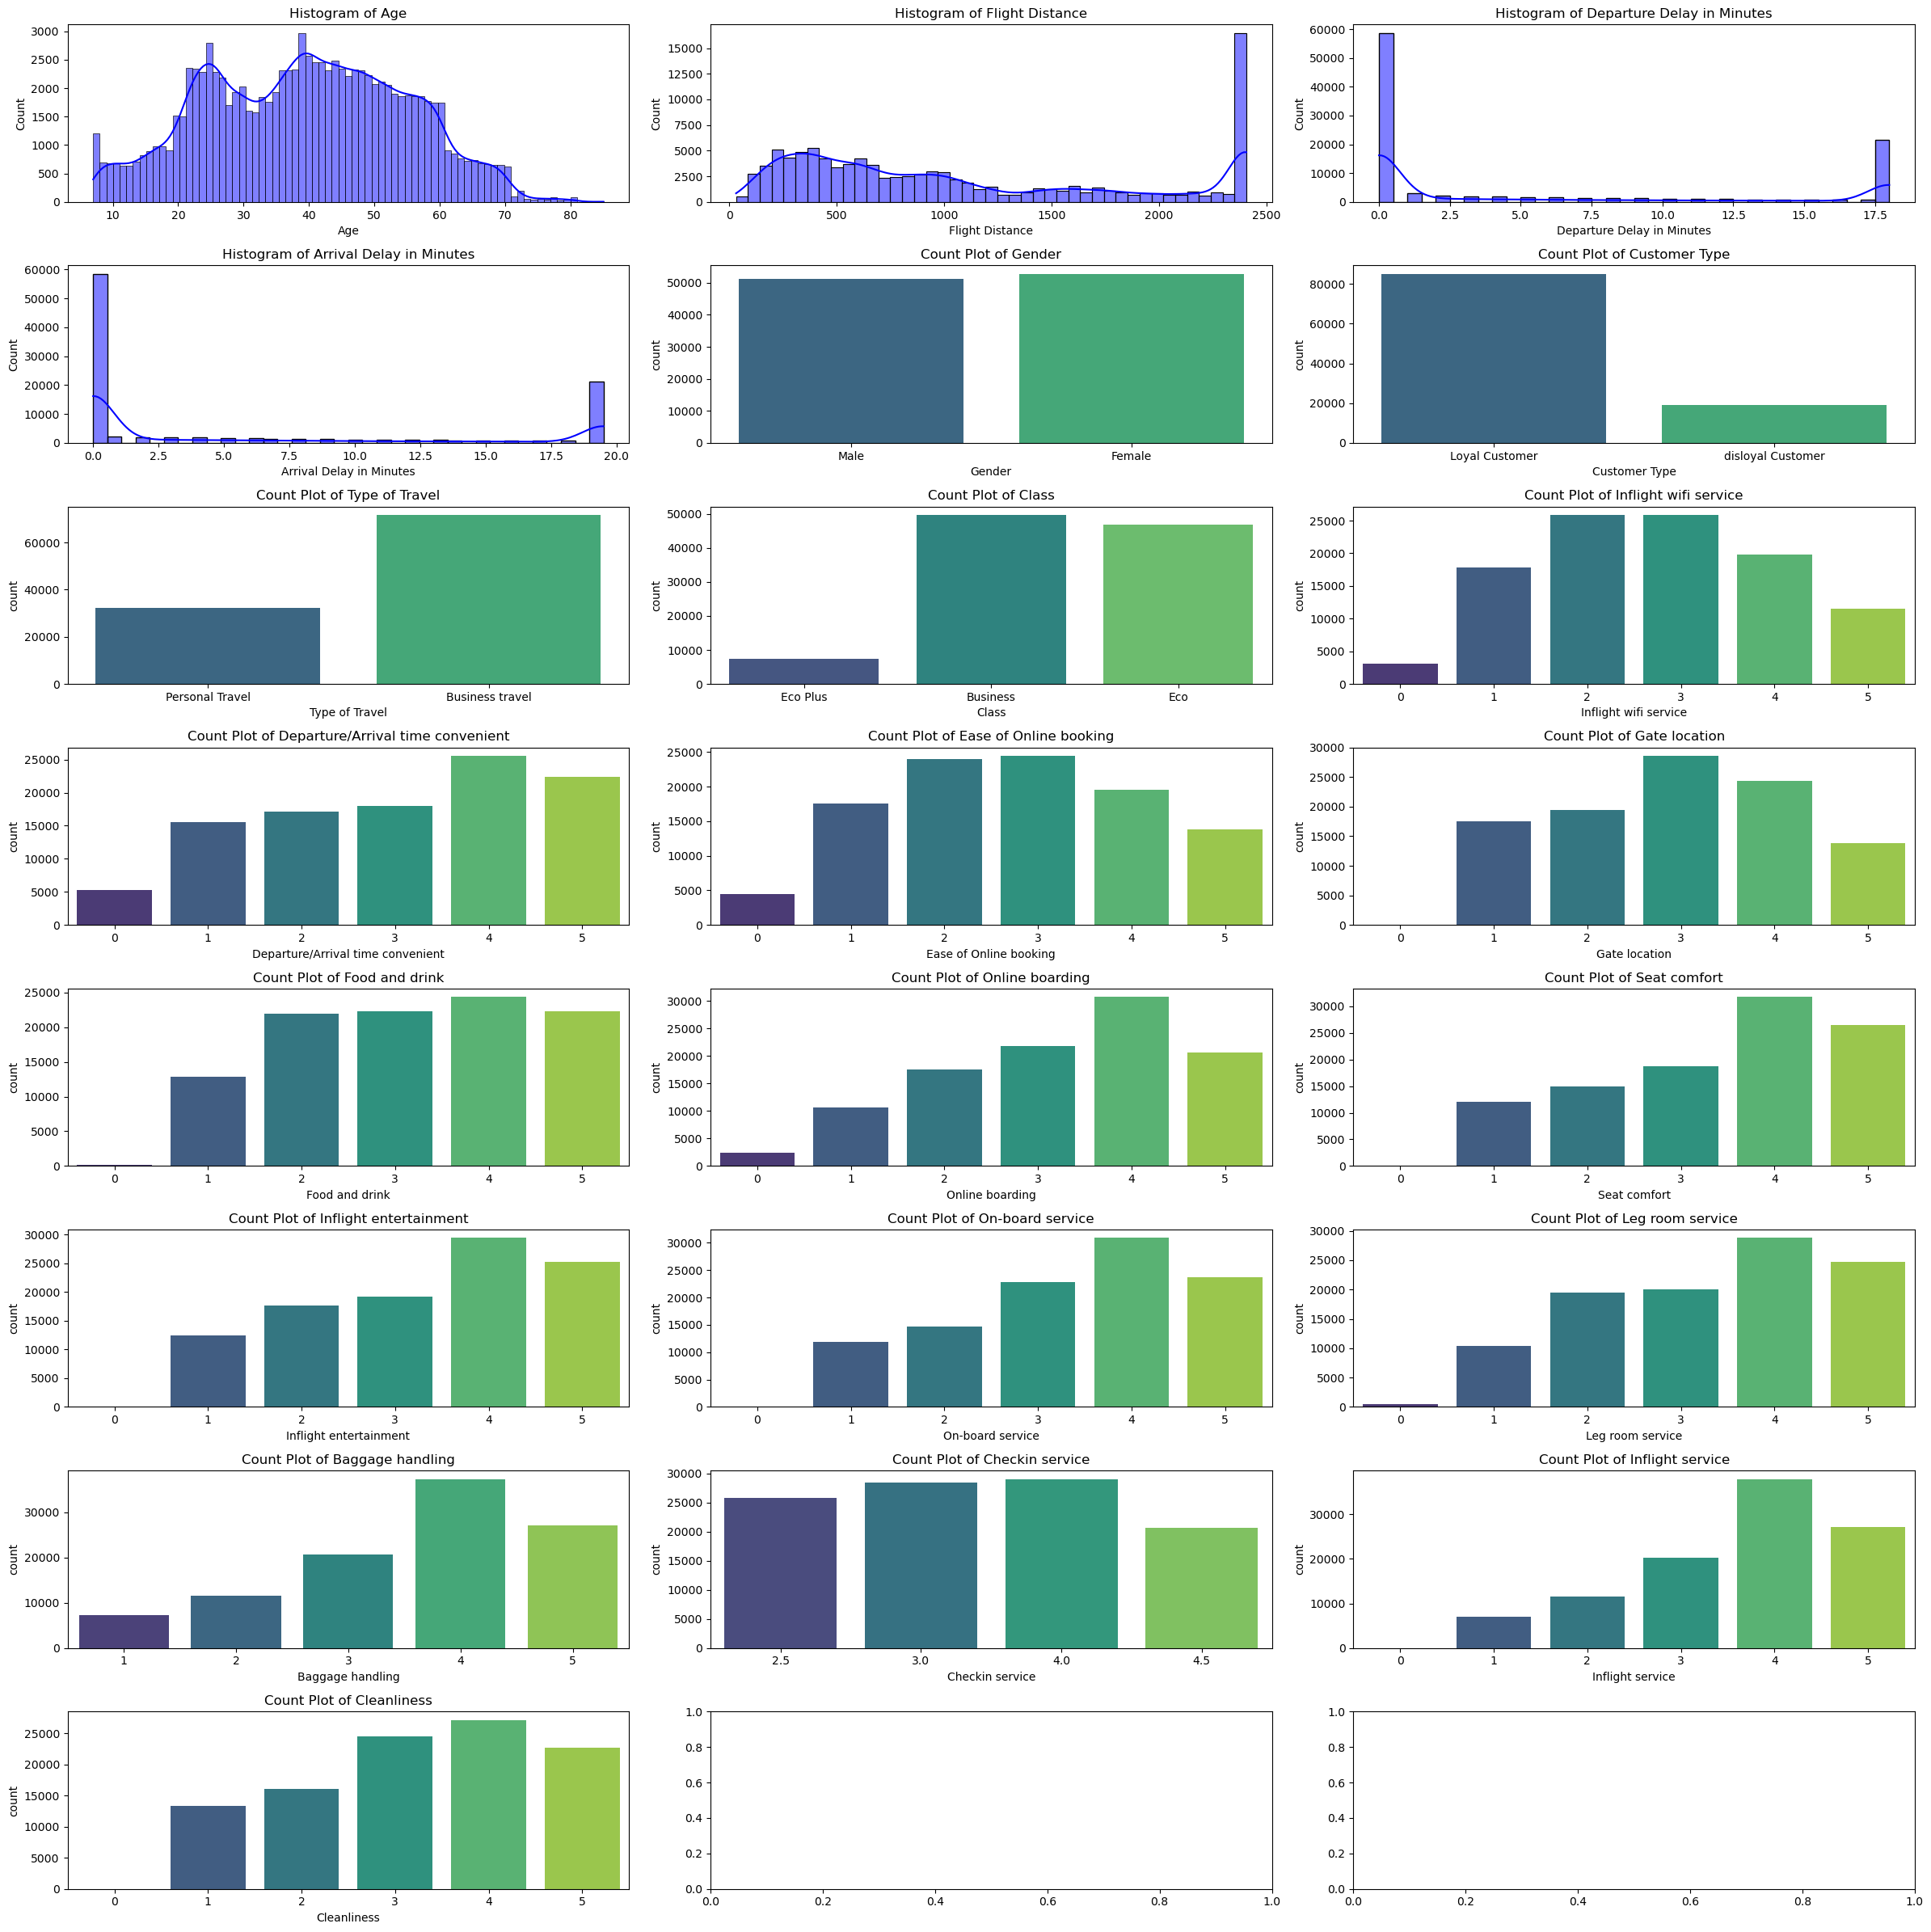

In [116]:
fig, axes = plt.subplots(nrows = 8, ncols =3, figsize = (24,24)) # number of graphs in a row and their size 
axes = axes.flatten() # converted in 2d

for i, col in enumerate(numerical_columns):
    sns.histplot(df[col], kde=True, ax=axes[i], color='blue')
    axes[i].set_title(f'Histogram of {col}')

# Plot bar plots for categorical features
for j, col in enumerate(categorical_columns):
    if i + 1 + j < len(axes):
        sns.countplot(x=df[col], ax=axes[i + 1 + j], palette='viridis')
        axes[i + 1 + j].set_title(f'Count Plot of {col}')

        
plt.tight_layout()
plt.show()

 ### Bivariate EDA

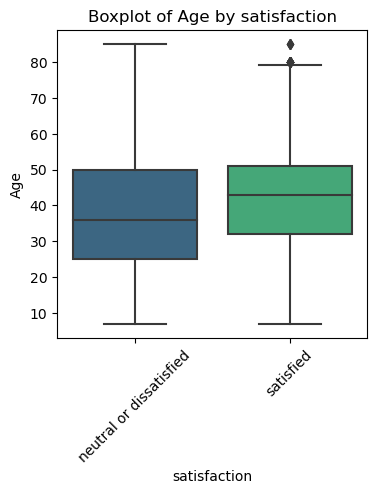

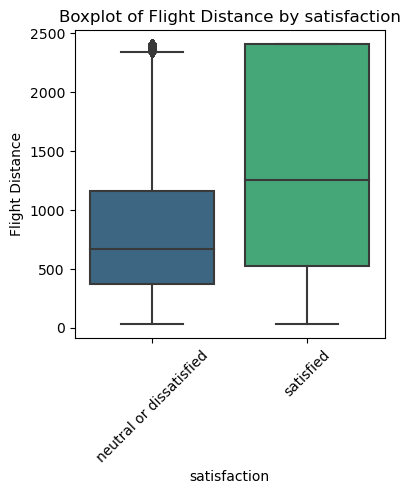

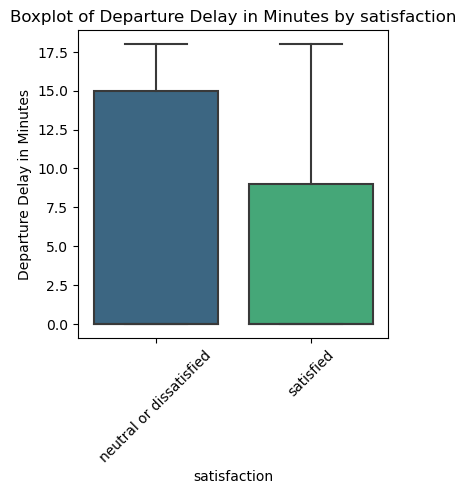

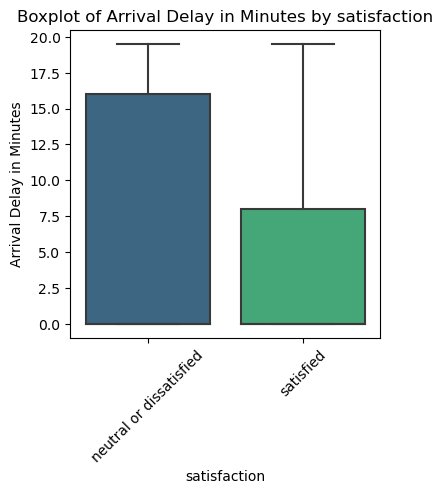

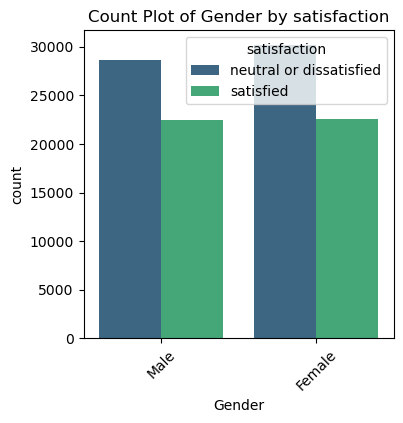

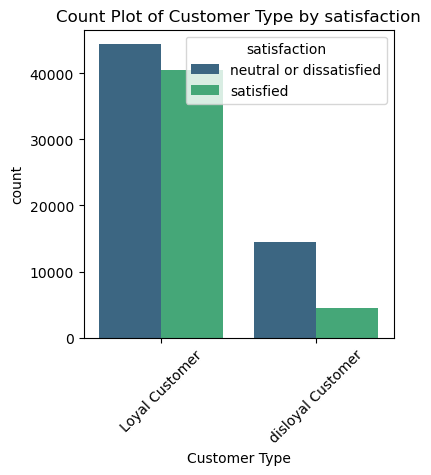

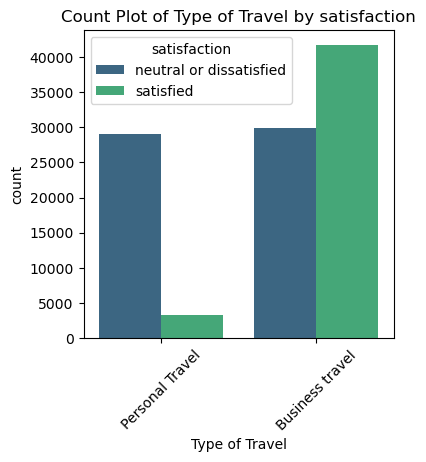

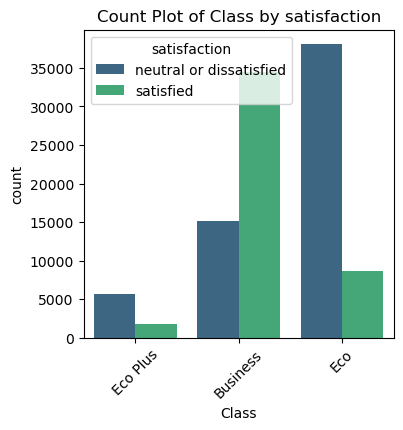

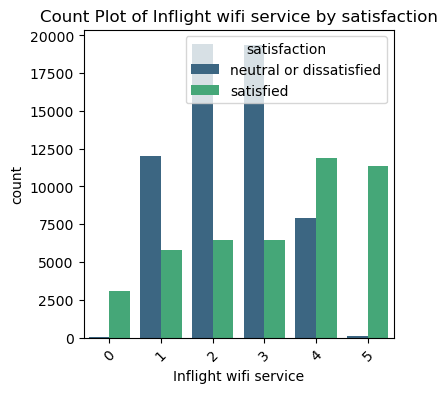

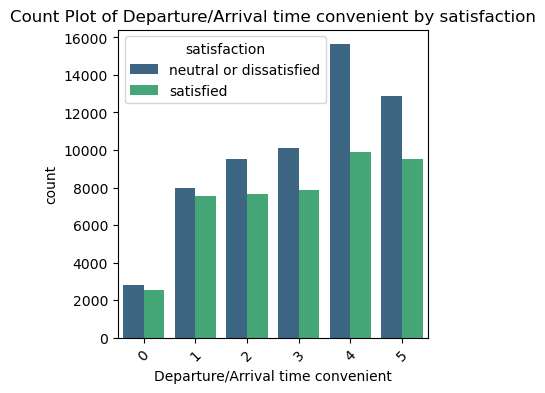

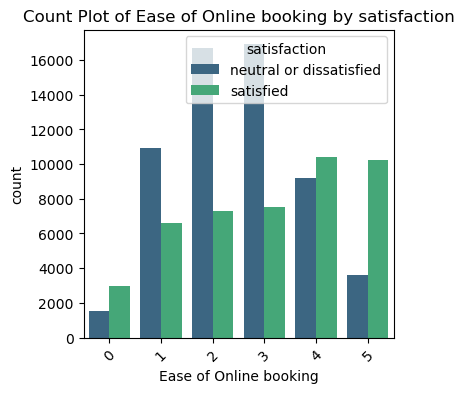

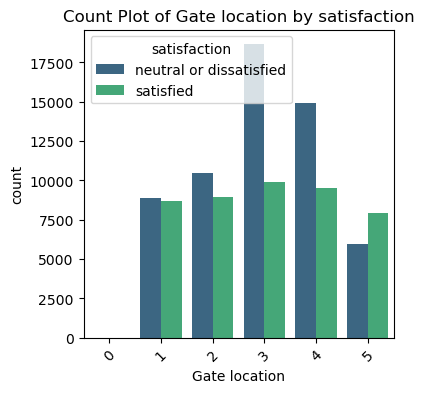

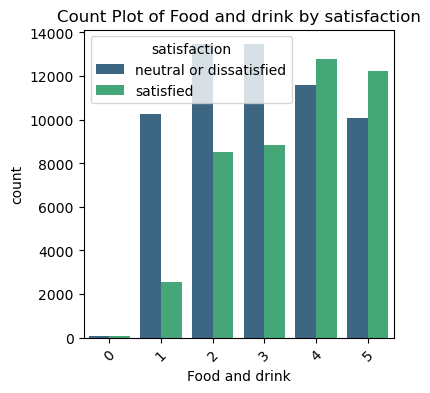

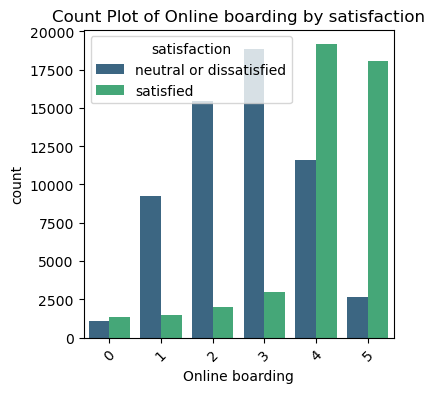

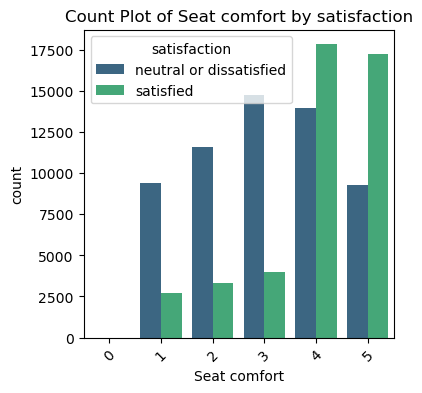

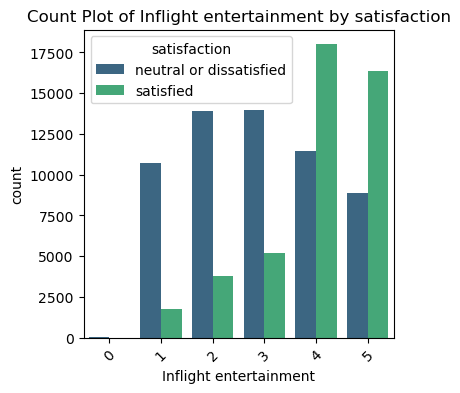

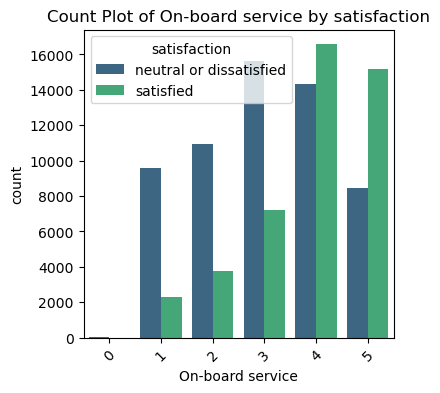

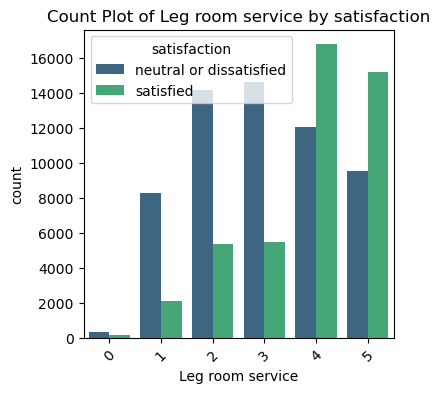

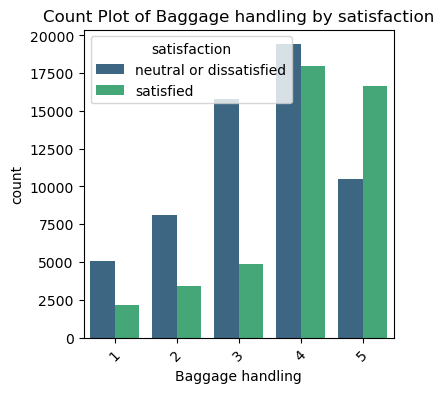

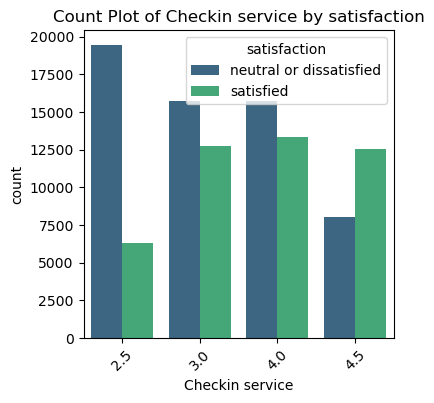

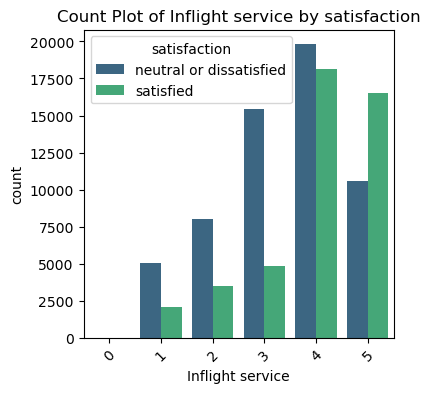

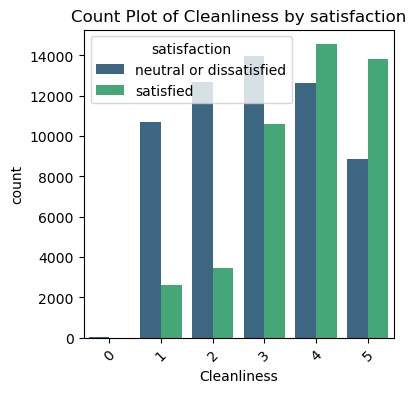

In [117]:
target_column = 'satisfaction'

# Numerical vs. Categorical
for col in numerical_columns:
    plt.figure(figsize=(4,4))
    sns.boxplot(x=df[target_column], y=df[col], palette='viridis')
    plt.title(f'Boxplot of {col} by {target_column}')
    plt.xticks(rotation=45)
    plt.show()

# Categorical vs. Categorical
for col in categorical_columns:
    plt.figure(figsize=(4,4))
    sns.countplot(x=df[col], hue=df[target_column], palette='viridis')
    plt.title(f'Count Plot of {col} by {target_column}')
    plt.xticks(rotation=45)
    plt.show()



### Multivariate EDA

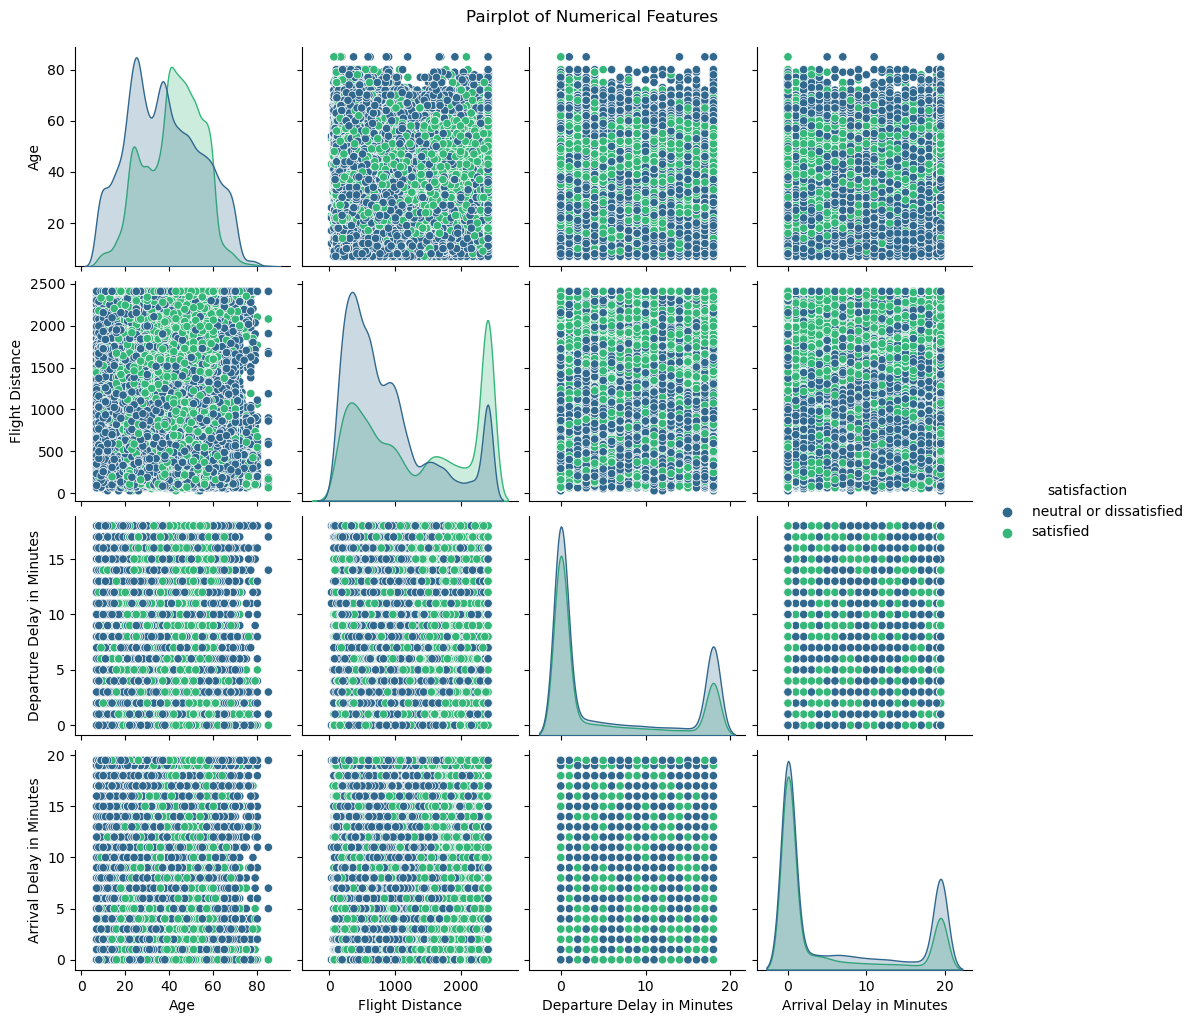

In [118]:
sns.pairplot(df[numerical_columns + [target_column]], hue = target_column, palette = "viridis")
plt.suptitle("Pairplot of Numerical Features", y=1.02)
plt.show()

## IMPORTANT INSIGHTS

- Majority of people who travel are from Age group 20 - 40. This age group is of youngsters like students, working professionals, tourists, businessmen, etc.  
- Most of people only travel for up to 1000km distance. As only tourist people travel for long distances.  
- Most of flights are not delayed but if they are delayed they are delayed for more than 24 hours. Generally, flights are delayed due to extreme weather conditions and if weather is bad it generally remains bad for quite a time.  
- Female travels slightly more than Males.  
- Most of flight customers are loyal which means they have taken this flight previously too.  
- Most of people travel for business purposes.  
- Most people travel in Business and Eco Class. Eco Plus price is generally between these two classes and just offers some basic amenities like leg-room, etc., which many people don't find valuable enough.  
- Flight wifi service is average. They should make it better.  
- They should focus on their online booking technology as people are facing problems due to this.  
- Seat comfort and inflight service is also not that good.  

## 4. FEATURE ENGINEERING

In [119]:
### make a new column using feature consr=truction (Domain Knowledge)

df["Total Delay"] = df['Departure Delay in Minutes'] + df['Arrival Delay in Minutes']

In [120]:
df["Delay Ratio"]= df["Total Delay"] / (df["Flight Distance"]+1) #+1 to remove zero error ex- 0/250 gives infinite so we add +1 

In [121]:
df.head(1)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Total Delay,Delay Ratio
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460.0,3,4,3,1,5,3,5,5,4,3,4,4.0,5,5,18,18.0,neutral or dissatisfied,36.0,0.078091


In [122]:
### CONVERT AGE USING BINNING
df['Age Group'] = pd.cut(df['Age'], bins = [0,18,30,50,100], labels = ["child", "youngster", "adult", "senior"])

In [123]:
df.head(1)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Total Delay,Delay Ratio,Age Group
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460.0,3,4,3,1,5,3,5,5,4,3,4,4.0,5,5,18,18.0,neutral or dissatisfied,36.0,0.078091,child


In [124]:
df.dtypes

Gender                                 object
Customer Type                          object
Age                                     int64
Type of Travel                         object
Class                                  object
Flight Distance                       float64
Inflight wifi service                   int64
Departure/Arrival time convenient       int64
Ease of Online booking                  int64
Gate location                           int64
Food and drink                          int64
Online boarding                         int64
Seat comfort                            int64
Inflight entertainment                  int64
On-board service                        int64
Leg room service                        int64
Baggage handling                        int64
Checkin service                       float64
Inflight service                        int64
Cleanliness                             int64
Departure Delay in Minutes              int64
Arrival Delay in Minutes          

###### columns that need encoding : gender, customer type, type of travel, class, satisfaction and age group

In [125]:
### LABEL ENCODING 
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

columns_to_encode = ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction', 'Age Group']

label_mappings = {} # contain which value is assigned to which category value

for col in columns_to_encode:
    df[col] = le.fit_transform(df[col])
    label_mappings[col] = dict(zip(le.classes_, le.transform(le.classes_)))
    # le.classes_ is attribute of label encoder ["red","blue","green"] - > ["blue","green","red"] (sorted alphabetically by default)
    
    
for col, mapping in label_mappings.items():
    print(f"Mapping for {col}: {mapping}")

Mapping for Gender: {'Female': 0, 'Male': 1}
Mapping for Customer Type: {'Loyal Customer': 0, 'disloyal Customer': 1}
Mapping for Type of Travel: {'Business travel': 0, 'Personal Travel': 1}
Mapping for Class: {'Business': 0, 'Eco': 1, 'Eco Plus': 2}
Mapping for satisfaction: {'neutral or dissatisfied': 0, 'satisfied': 1}
Mapping for Age Group: {'adult': 0, 'child': 1, 'senior': 2, 'youngster': 3}


In [126]:
df.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction', 'Total Delay', 'Delay Ratio', 'Age Group'],
      dtype='object')

In [127]:
df.head(1)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Total Delay,Delay Ratio,Age Group
0,1,0,13,1,2,460.0,3,4,3,1,5,3,5,5,4,3,4,4.0,5,5,18,18.0,0,36.0,0.078091,1


In [128]:
df.dtypes

Gender                                 int32
Customer Type                          int32
Age                                    int64
Type of Travel                         int32
Class                                  int32
Flight Distance                      float64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                      float64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
satisfacti

In [129]:
df.shape

(103904, 26)

In [131]:
### Feature Selection
from sklearn.model_selection import train_test_split

x = df.drop(columns = "satisfaction")
y = df["satisfaction"]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [132]:
len(x.columns) # this tells that 25 columns go in x(input)

25

In [136]:
from sklearn.feature_selection import mutual_info_classif

#calculte mutual information
mutual_info = mutual_info_classif(x_train,y_train, discrete_features = True)

# create a dataframe for mutual inofrmation
mutual_info_df = pd.DataFrame({
    "Feature": x.columns,
    "Mutual Information": mutual_info
}).sort_values(by="Mutual Information", ascending = False)

mutual_info_df

,Feature,Mutual Information
11,Online boarding,0.211611
6,Inflight wifi service,0.161543
23,Delay Ratio,0.141715
4,Class,0.134969
3,Type of Travel,0.113675
13,Inflight entertainment,0.092882
12,Seat comfort,0.078537
5,Flight Distance,0.071031
15,Leg room service,0.060404
14,On-board service,0.057027


In [137]:
### create our final dataframe with important features

top_features = mutual_info_df.head(12)["Feature"].tolist()

In [138]:
top_features

['Online boarding',
 'Inflight wifi service',
 'Delay Ratio',
 'Class',
 'Type of Travel',
 'Inflight entertainment',
 'Seat comfort',
 'Flight Distance',
 'Leg room service',
 'On-board service',
 'Ease of Online booking',
 'Cleanliness']

In [139]:
final_df = df[top_features + ["satisfaction"]]

In [140]:
final_df.head(3)

,Online boarding,Inflight wifi service,Delay Ratio,Class,Type of Travel,Inflight entertainment,Seat comfort,Flight Distance,Leg room service,On-board service,Ease of Online booking,Cleanliness,satisfaction
0,3,3,0.078091,2,1,5,5,460.0,3,4,3,5,0
1,3,3,0.029661,0,0,1,1,235.0,5,1,3,1,0
2,5,2,0.000000,0,0,5,5,1142.0,3,4,2,5,1


In [142]:
final_df.shape

(103904, 13)

In [141]:
# checking any umbalance in data
final_df["satisfaction"].value_counts()

0    58879
1    45025
Name: satisfaction, dtype: int64

## 5. Model Training

In [143]:
final_df.columns

Index(['Online boarding', 'Inflight wifi service', 'Delay Ratio', 'Class',
       'Type of Travel', 'Inflight entertainment', 'Seat comfort',
       'Flight Distance', 'Leg room service', 'On-board service',
       'Ease of Online booking', 'Cleanliness', 'satisfaction'],
      dtype='object')

In [145]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
import lightgbm as lgb
import xgboost as xgb


#we train model on all the algorithms and select the best one and then will 

# Sample 5% of the data
df_sample = final_df.sample(frac=0.05, random_state=42)

# Prepare the sample data
X_sample = final_df.drop(columns='satisfaction')
y_sample = final_df['satisfaction']


# Split the sampled data
X_train_sample, X_test_sample, y_train_sample, y_test_sample = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42)

# Initialize classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(n_estimators=50, n_jobs=-1),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=50),
    'AdaBoost': AdaBoostClassifier(n_estimators=50),
    'Support Vector Classifier': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'LightGBM': lgb.LGBMClassifier(),
    'XGBoost': xgb.XGBClassifier(eval_metric='mlogloss')
}

# Train and evaluate each classifier
results = {}
for name, clf in classifiers.items():
    clf.fit(X_train_sample, y_train_sample)
    y_pred = clf.predict(X_test_sample)
    accuracy = accuracy_score(y_test_sample, y_pred)
    results[name] = accuracy

# Print results
for name, accuracy in results.items():
    print(f"{name}: {accuracy:.4f}")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 35957, number of negative: 47166
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002821 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 563
[LightGBM] [Info] Number of data points in the train set: 83123, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.432576 -> initscore=-0.271350
[LightGBM] [Info] Start training from score -0.271350
Logistic Regression: 0.8220
Random Forest: 0.9416
Gradient Boosting: 0.9223
AdaBoost: 0.9106
Support Vector Classifier: 0.6655
K-Nearest Neighbors: 0.8705
Naive Bayes: 0.8541
Decision Tree: 0.9241
LightGBM: 0.9438
XGBoost: 0.9440


######  we know LGBM is the best model for us - its fast

In [146]:
## MAKING LGBM MODEL

In [147]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import lightgbm as lgb

In [148]:
x = final_df.drop(columns = "satisfaction")
y = final_df["satisfaction"]

In [150]:
x_train, x_test, y_train,y_test = train_test_split(x,y, test_size = 0.2, random_state=42)

In [151]:
lgbm_model = lgb.LGBMClassifier()
lgbm_model.fit(x_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 35957, number of negative: 47166
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001864 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 563
[LightGBM] [Info] Number of data points in the train set: 83123, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.432576 -> initscore=-0.271350
[LightGBM] [Info] Start training from score -0.271350


LGBMClassifier()

In [152]:
y_pred = lgbm_model.predict(x_test)

In [154]:
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred, average = "weighted") # use weighted average for multi-class
recall = recall_score(y_test,y_pred, average = "weighted")
f1 = f1_score(y_test,y_pred, average = "weighted")

In [155]:
print(f"Accuracy:{accuracy:.4f}")
print(f"Precision:{precision:.4f}")
print(f"Recall:{recall:.4f}")
print(f"F1 Score:{f1:.4f}")

Accuracy:0.9438
Precision:0.9440
Recall:0.9438
F1 Score:0.9437


###### we don't do hyperparameter tuning as there was a risk of overfitting as model is already quite good

## 6. MODEL SAVING

In [157]:
import pickle

with open("lgbm_model.pkl","wb") as file:
    pickle.dump(lgbm_model,file)

## 7. MODEL LOADING AND TESTING

In [158]:
with open("lgbm_model.pkl","rb") as file:
    loaded_model = pickle.load(file)

In [159]:
x_train[8:10]

,Online boarding,Inflight wifi service,Delay Ratio,Class,Type of Travel,Inflight entertainment,Seat comfort,Flight Distance,Leg room service,On-board service,Ease of Online booking,Cleanliness
84550,5,4,0.0,0,0,2,5,2407.5,2,2,4,3
17315,2,2,0.0,1,1,3,3,986.0,4,4,2,3


In [160]:
y_train[8:10]

84550    1
17315    0
Name: satisfaction, dtype: int32

In [161]:
x_new = np.array([
    [5,4,0.0,0,0,2,5,2407.5,2,2,4,3],
    [2,2,0.0,1,1,3,3,986.0,4,4,2,3]
])

In [162]:
y_pred_new = loaded_model.predict(x_new)

In [163]:
print("Prediction", y_pred_new)

Prediction [1 0]


In [164]:
# doing good prediction...

### we have our ml model now
#### let's go to app building